In [2]:
import warnings
warnings.filterwarnings('ignore') # waring message 안 나타나게 하기.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 파일 불러오기
df_org = pd.read_csv("C:/Users/gherwt/KDT30/p1/seongdong_df_total.csv")

In [4]:
# house_df = house_df_org 데이터가 저장된 주소만을 복사하기 때문에 얕은 복사 = 주소 만을 공유
seongdeong = df_org.copy() # 깊은 복사
seongdeong.head()

# Target 값 : total_deposit (마지막 칼럼)

,Unnamed: 0,date,build_year,dong,jibun,floor,use_area,res_cnt,cctv_cnt,school_dis,total_deposit
0,0,201501,1986,하왕십리동,890-401,3,39.70,36,268,0.104621,15000
1,1,201501,2012,하왕십리동,890-114,4,13.97,36,268,0.104621,8714
2,2,201501,1977,홍익동,125,3,85.36,51,81,0.180476,17000
3,3,201501,2014,홍익동,367,2,27.45,51,81,0.180476,19000
4,4,201501,2012,도선동,188,5,17.56,75,66,0.038938,11714


In [5]:
# 데이터 확인
seongdeong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12211 non-null  int64  
 1   date           12211 non-null  int64  
 2   build_year     12211 non-null  int64  
 3   dong           12211 non-null  object 
 4   jibun          12211 non-null  object 
 5   floor          12211 non-null  int64  
 6   use_area       12211 non-null  float64
 7   res_cnt        12211 non-null  int64  
 8   cctv_cnt       12211 non-null  int64  
 9   school_dis     12211 non-null  float64
 10  total_deposit  12211 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.0+ MB


**데이터 타입과 Null 값 갯수 확인**

In [6]:
print('데이터 세트의 Shape:', seongdeong.shape) # 전체 몇 행, 몇 열
print('\n전체 feature 들의 type \n',seongdeong.dtypes.value_counts()) # type 을 확인

# Null 컬럼 확인
isnull_series = seongdeong.isnull().sum()

데이터 세트의 Shape: (12211, 11)

전체 feature 들의 type 
 int64      7
object     2
float64    2
Name: count, dtype: int64


### 회귀 모델 적용하기 전에 타겟 값의 분포도 확인

- total_deposit 의 분포도 확인

<Axes: title={'center': 'Original total_deposit Histogram'}, xlabel='total_deposit', ylabel='Density'>

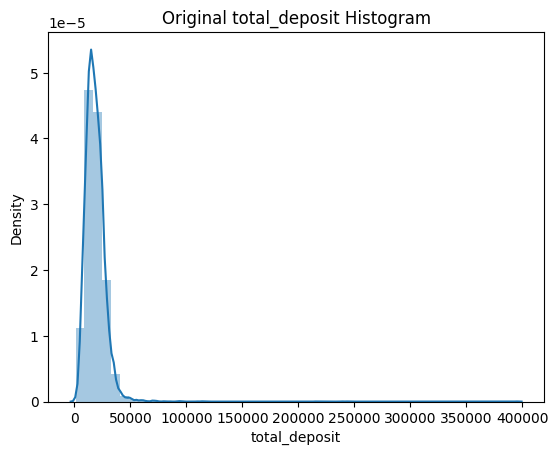

In [7]:
plt.title('Original total_deposit Histogram')
sns.distplot(seongdeong['total_deposit'])

In [8]:
# 원래값 저장
original_SalePrince = seongdeong['total_deposit']

**문자열값은 모두 카테고리값. 판다스의 get_dummies( )를 이용하여 원-핫 인코딩 수행**

In [9]:
print('get_dummies() 수행 전 데이터 Shape:', seongdeong.shape)
seongdeong_ohe = pd.get_dummies(seongdeong) # one-hot encoding 수행
print('get_dummies() 수행 후 데이터 Shape:', seongdeong_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (12211, 11)
get_dummies() 수행 후 데이터 Shape: (12211, 1273)


### 선형 회귀 모델의 학습/예측/평가

LinearRegression, Ridge, Lasso를 이용해 선형 계열의 회귀 모델 만들기

**RMSE 평가 함수 생성**

In [10]:
## 데이터 분할
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃과 피처
y_target = seongdeong_ohe['total_deposit']
X_features = seongdeong_ohe.drop('total_deposit',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [11]:
# 단일 모델의 RMSE 값 반환
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse) # 루트를 씌워서 데이터 간의 격차를 줄여준다.
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환/ 각각의 모델들에 대해서 rmse 를 리턴하는 함수를 만들겠다.
def get_rmses(models):
    rmses = [] # 반환된 각 모델의 rmse값을 저장한다.
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)    
    return rmses # 전달된 모델들의 rmse 값들이 저장된 list 가 반환이 된다.

**모델 학습/예측/평가ㅣ**

In [12]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [13]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression RMSE: 4367.46
Ridge RMSE: 4248.991
Lasso RMSE: 4357.903


[4367.459608561597, 4248.990950837935, 4357.903364637058]

In [14]:
# 시각화작업
# 각 모델에서 결정한 회귀계수 값 중 상위/하위 10개의 회귀계수 값과 해당 index를 반환하는 함수.
def get_top_bottom_coef(model) :
    
    # series 생성한다. 각 독립변수의 회귀계수가 저장됨
    coef = pd.Series(model.coef_, index=X_features.columns)

    # 내림차순 상위 10개
    coef_high = coef.sort_values(ascending=False).head(10)
    
    # 내림차순 하위 10개
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [15]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):
    
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성, 한번에 3개의 그래프를 그릴 수 있도록 한다.
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 

    palette = sns.color_palette("husl", n_colors=len(models))
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, (model, color) in enumerate(zip(models, palette)):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값, 안쪽을 좁게
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22) # 글씨 크기 설정
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

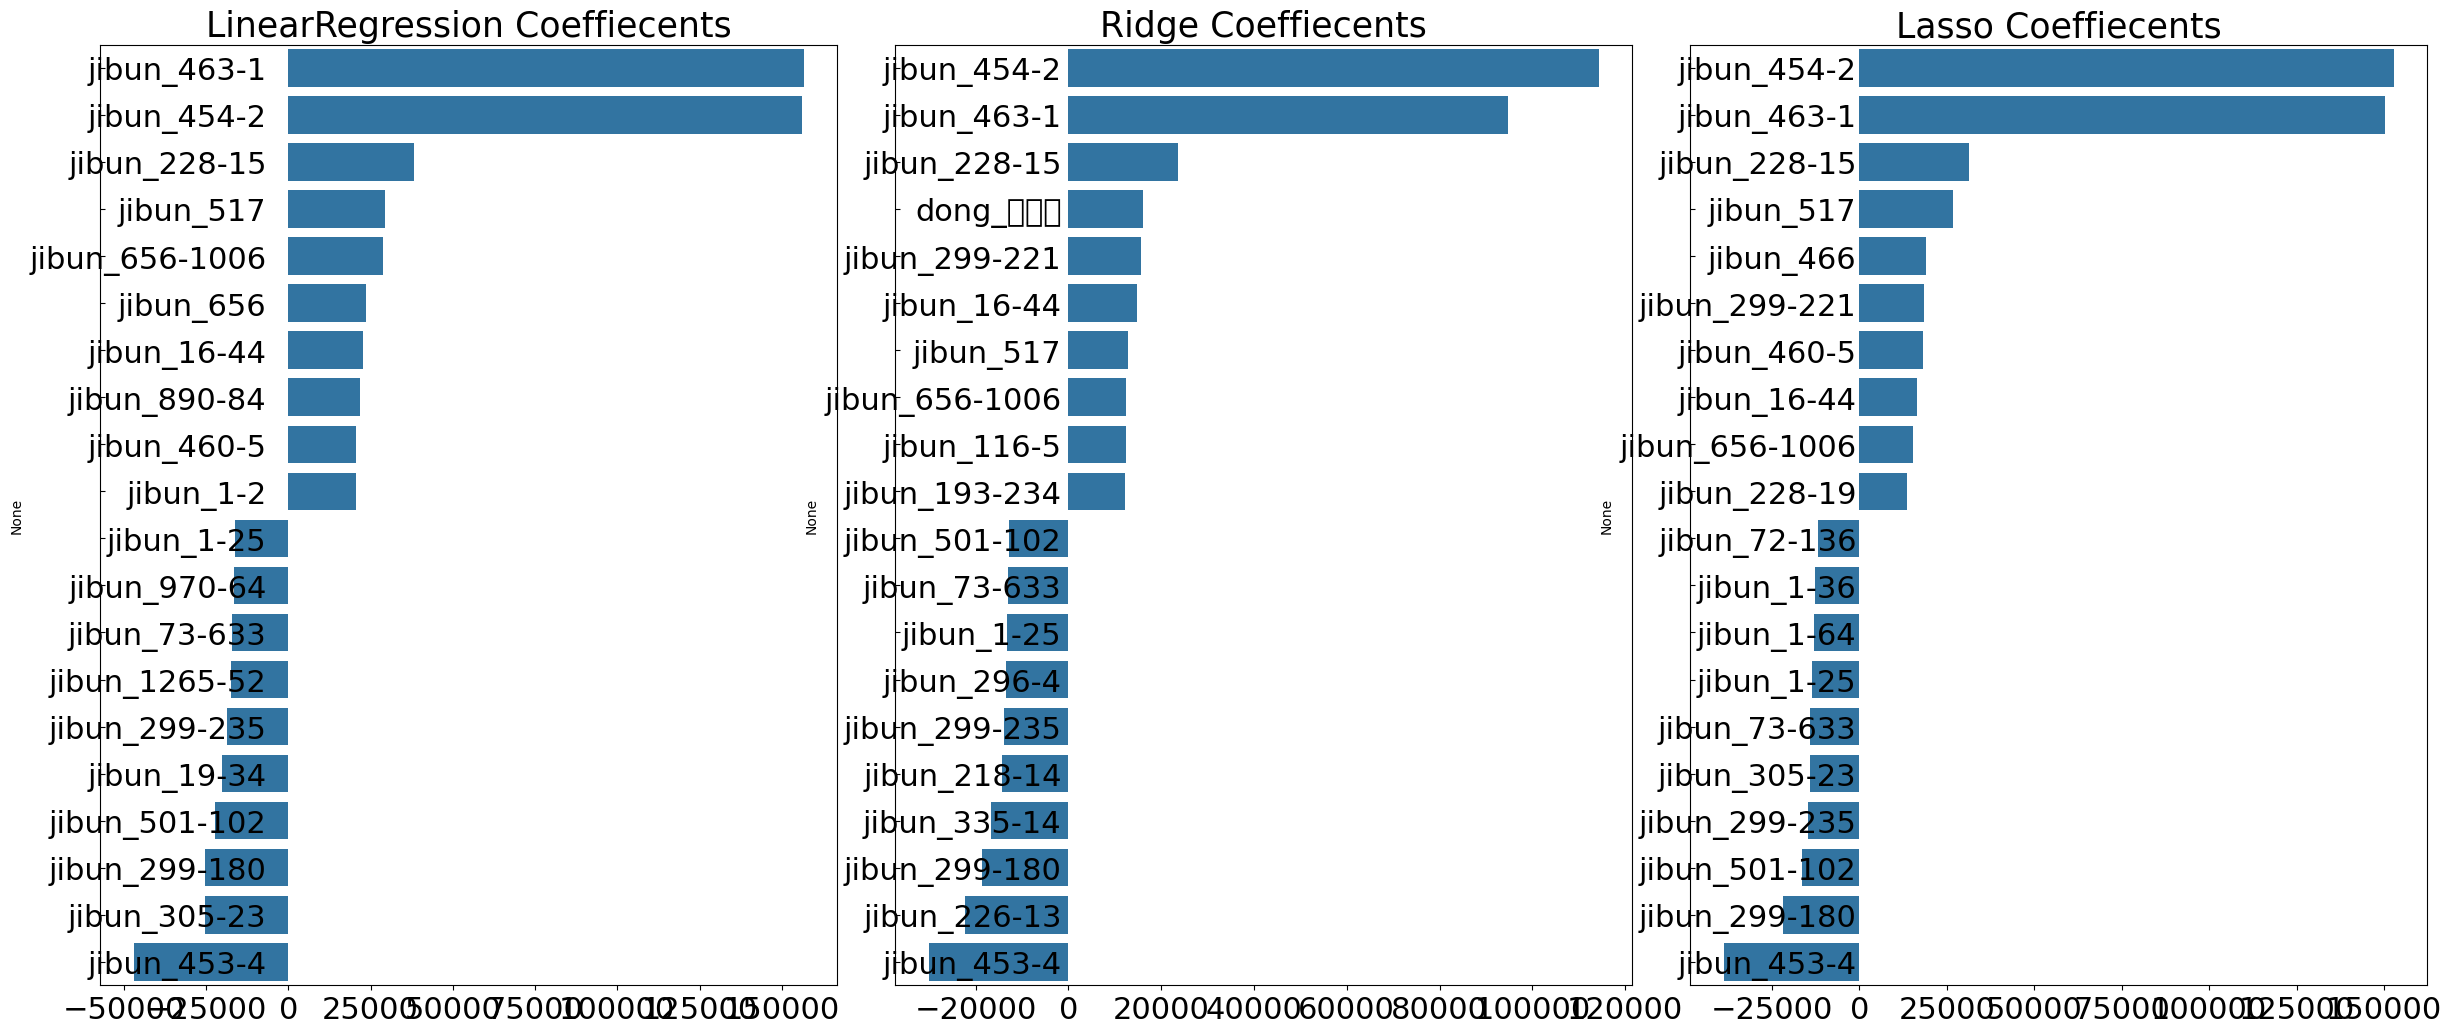

In [16]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [17]:
X_train.shape

# 고칠점 : 지번 값과 index 값을 빼주고 진행한다.
# 지번 값을 기준으로 주소의 좌표값을 구하고 거기서 가장 가까운 지하철역을 구해서 다시 모델링을 진행한다.

(9768, 1272)